# Ford Gobike Dataset
## by : Bassem Ibrahim Mahmoud

## Preliminary Wrangling

> This dataset containing the trip data of the fordgo bike.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Individual rides in a bike-sharing system that covers the larger San Francisco Bay region are included in this data collection.

In [3]:
# load data set and display it
go=pd.read_csv('./fordgobike-tripdata.csv')
go

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Male,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239106,184,2019-04-01 00:09:17.5660,2019-04-01 00:12:22.5170,133.0,Valencia St at 22nd St,37.755213,-122.420975,132.0,24th St at Chattanooga St,37.751819,-122.426614,6430,Subscriber,1976.0,Male,No
239107,539,2019-04-01 00:03:02.5730,2019-04-01 00:12:02.0670,78.0,Folsom St at 9th St,37.773717,-122.411647,77.0,11th St at Natoma St,37.773507,-122.416040,4972,Subscriber,1981.0,Male,Yes
239108,292,2019-04-01 00:06:04.2370,2019-04-01 00:10:56.9850,243.0,Bancroft Way at College Ave,37.869360,-122.254337,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,3415,Subscriber,1997.0,Male,Yes
239109,471,2019-04-01 00:01:38.4110,2019-04-01 00:09:29.9650,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5018,Subscriber,1996.0,Female,Yes


### What is the structure of your dataset?

> 239111 Trips with details in 16 columns

### What is/are the main feature(s) of interest in your dataset?

> Gender,
> Trips duration,
> Trips Start and End Time,
> Age.
> Membership.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Every Item in it like gender and age will effect on the average trip duration so that the start station and the end station may be affect too.

In [4]:
# display dataset information
go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             239111 non-null  int64  
 1   start_time               239111 non-null  object 
 2   end_time                 239111 non-null  object 
 3   start_station_id         239047 non-null  float64
 4   start_station_name       239047 non-null  object 
 5   start_station_latitude   239111 non-null  float64
 6   start_station_longitude  239111 non-null  float64
 7   end_station_id           239047 non-null  float64
 8   end_station_name         239047 non-null  object 
 9   end_station_latitude     239111 non-null  float64
 10  end_station_longitude    239111 non-null  float64
 11  bike_id                  239111 non-null  int64  
 12  user_type                239111 non-null  object 
 13  member_birth_year        227912 non-null  float64
 14  memb

In [5]:
#display dataset shape infos
go.shape

(239111, 16)

In [6]:
# convert each of start & end time to date-time format, and display changes
go['start_time']=pd.to_datetime(go['start_time'])
go['end_time']=pd.to_datetime(go['end_time'])
go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             239111 non-null  int64         
 1   start_time               239111 non-null  datetime64[ns]
 2   end_time                 239111 non-null  datetime64[ns]
 3   start_station_id         239047 non-null  float64       
 4   start_station_name       239047 non-null  object        
 5   start_station_latitude   239111 non-null  float64       
 6   start_station_longitude  239111 non-null  float64       
 7   end_station_id           239047 non-null  float64       
 8   end_station_name         239047 non-null  object        
 9   end_station_latitude     239111 non-null  float64       
 10  end_station_longitude    239111 non-null  float64       
 11  bike_id                  239111 non-null  int64         
 12  user_type       

In [7]:
# display none available data
go.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id              64
start_station_name            64
start_station_latitude         0
start_station_longitude        0
end_station_id                64
end_station_name              64
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          11199
member_gender              11199
bike_share_for_all_trip        0
dtype: int64

In [8]:
# remove none available data
go.dropna(inplace=True)

In [9]:
# display dataset after changes
go.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [10]:
# calculate duration in minutes & age from member_birth_year
go['age']=2021-go.member_birth_year
go['duration_min']=go.duration_sec/60

# make columns for Dayname & Hour of start_time & end_time
go["start_day"]=go['start_time'].dt.day_name()
go["start_hour"]=go['start_time'].dt.hour

go["end_day"]=go['end_time'].dt.day_name()
go["end_hour"]=go['end_time'].dt.hour

# display data set after changes
go

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min,start_day,start_hour,end_day,end_hour
0,50305,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,...,Subscriber,1989.0,Female,No,32.0,838.416667,Tuesday,22,Wednesday,12
2,78072,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,...,Subscriber,1993.0,Male,No,28.0,1301.200000,Tuesday,10,Wednesday,8
3,78969,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,...,Subscriber,1972.0,Male,No,49.0,1316.150000,Tuesday,10,Wednesday,7
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,...,Subscriber,1973.0,Male,No,48.0,18.800000,Tuesday,23,Wednesday,0
5,1388,2019-04-30 23:53:05.982,2019-05-01 00:16:14.313,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,...,Customer,1997.0,Male,No,24.0,23.133333,Tuesday,23,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239106,184,2019-04-01 00:09:17.566,2019-04-01 00:12:22.517,133.0,Valencia St at 22nd St,37.755213,-122.420975,132.0,24th St at Chattanooga St,37.751819,...,Subscriber,1976.0,Male,No,45.0,3.066667,Monday,0,Monday,0
239107,539,2019-04-01 00:03:02.573,2019-04-01 00:12:02.067,78.0,Folsom St at 9th St,37.773717,-122.411647,77.0,11th St at Natoma St,37.773507,...,Subscriber,1981.0,Male,Yes,40.0,8.983333,Monday,0,Monday,0
239108,292,2019-04-01 00:06:04.237,2019-04-01 00:10:56.985,243.0,Bancroft Way at College Ave,37.869360,-122.254337,269.0,Telegraph Ave at Carleton St,37.862320,...,Subscriber,1997.0,Male,Yes,24.0,4.866667,Monday,0,Monday,0
239109,471,2019-04-01 00:01:38.411,2019-04-01 00:09:29.965,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Subscriber,1996.0,Female,Yes,25.0,7.850000,Monday,0,Monday,0


In [11]:
# make data set tiny by removing un-useful columns
exclused=['duration_sec','start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','bike_id','bike_share_for_all_trip']
go.drop(exclused,axis=1,inplace=True)
go

,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,age,duration_min,start_day,start_hour,end_day,end_hour
0,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,Myrtle St at Polk St,Union Square (Powell St at Post St),Subscriber,1989.0,Female,32.0,838.416667,Tuesday,22,Wednesday,12
2,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,5th St at Brannan St,5th St at Brannan St,Subscriber,1993.0,Male,28.0,1301.200000,Tuesday,10,Wednesday,8
3,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,San Francisco Caltrain Station 2 (Townsend St...,Division St at Potrero Ave,Subscriber,1972.0,Male,49.0,1316.150000,Tuesday,10,Wednesday,7
4,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,19th St at Florida St,Powell St BART Station (Market St at 5th St),Subscriber,1973.0,Male,48.0,18.800000,Tuesday,23,Wednesday,0
5,2019-04-30 23:53:05.982,2019-05-01 00:16:14.313,Bancroft Way at College Ave,Fulton St at Bancroft Way,Customer,1997.0,Male,24.0,23.133333,Tuesday,23,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239106,2019-04-01 00:09:17.566,2019-04-01 00:12:22.517,Valencia St at 22nd St,24th St at Chattanooga St,Subscriber,1976.0,Male,45.0,3.066667,Monday,0,Monday,0
239107,2019-04-01 00:03:02.573,2019-04-01 00:12:02.067,Folsom St at 9th St,11th St at Natoma St,Subscriber,1981.0,Male,40.0,8.983333,Monday,0,Monday,0
239108,2019-04-01 00:06:04.237,2019-04-01 00:10:56.985,Bancroft Way at College Ave,Telegraph Ave at Carleton St,Subscriber,1997.0,Male,24.0,4.866667,Monday,0,Monday,0
239109,2019-04-01 00:01:38.411,2019-04-01 00:09:29.965,Jones St at Post St,San Francisco Public Library (Grove St at Hyde...,Subscriber,1996.0,Female,25.0,7.850000,Monday,0,Monday,0


In [12]:
# display dataset describes for numeric columns
go.describe()

,member_birth_year,age,duration_min,start_hour,end_hour
count,227848.000000,227848.000000,227848.000000,227848.000000,227848.000000
mean,1984.862448,36.137552,12.861290,13.652624,13.813560
std,9.953599,9.953599,30.366500,4.779413,4.803147
min,1878.000000,20.000000,1.016667,0.000000,0.000000
25%,1980.000000,29.000000,5.766667,9.000000,9.000000
50%,1987.000000,34.000000,9.216667,14.000000,15.000000
75%,1992.000000,41.000000,14.416667,17.000000,18.000000
max,2001.000000,143.000000,1435.233333,23.000000,23.000000


## Univariate Exploration

> In this section, we'll investigate distributions of individual variables. to see unusual points or outliers, take a deeper look at the dataset, and look at relationships between variables.

### We'll start by looking at the Age of individuals as an important factor.
> There is a long tail in the distribution so let's put limitation scales to more specification.
>> After Customization:
>>- We see that more than 6000 trips by individuals about 20th years old 
>>- The most of trips by individuals between 20th and 40th years old
>>- That mean most individuals from younger people

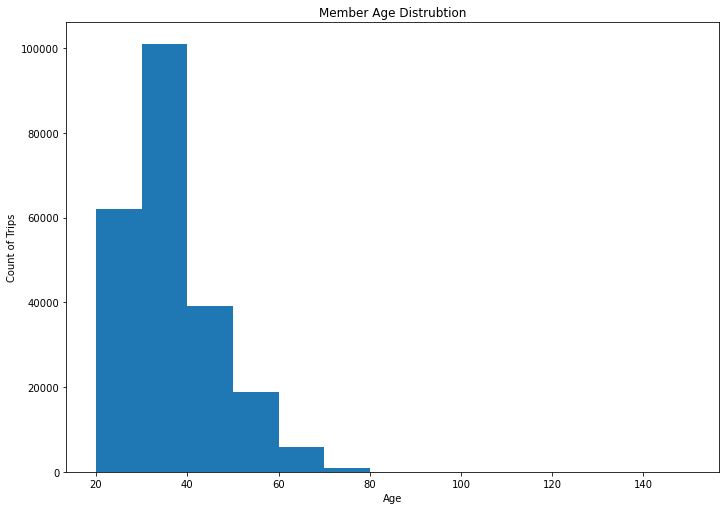

In [13]:
plt.figure(figsize = [11.69, 8.27])
# customize bins for x axis
bins=np.arange(go.age.min(),go.age.max()+10,10)
# customize color for plot
base=sb.color_palette()[0]
plt.hist(data=go,x='age',color=base,bins=bins);
# specify title and axis labels
plt.title('Member Age Distrubtion')
plt.xlabel('Age')
plt.ylabel('Count of Trips');

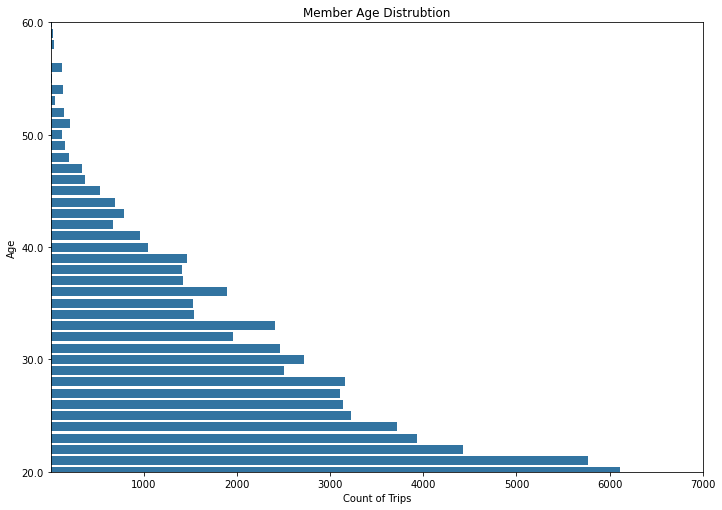

In [14]:
# customize color for plot
base=sb.color_palette()[0]

plt.figure(figsize=[11.69, 8.27])
sb.countplot(data=go,y='age',color=base);
plt.yticks(bins,bins);

# specify title and axis labels and limits
plt.xlim(1,7000)
plt.ylim(20,60);
plt.title('Member Age Distrubtion')
plt.xlabel('Count of Trips')
plt.ylabel('Age');

### We'll continue by looking at User type of individuals.
> From that, we see that about 85% of individuals are Subscribers.

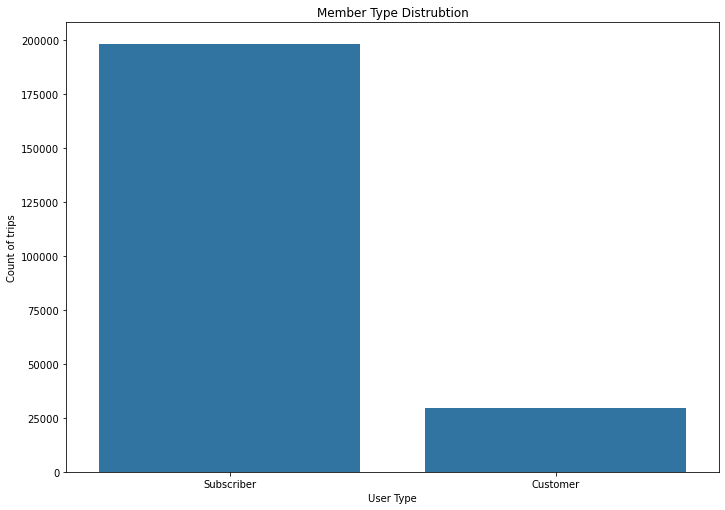

In [15]:
plt.figure(figsize = [11.69, 8.27])
sb.countplot(data=go,x='user_type',color=base);

# specify title and axis labels
plt.title('Member Type Distrubtion')
plt.xlabel('User Type')
plt.ylabel('Count of trips');

### We'll see any pattern in trips during days of the week.
> That's clearly the fewer trips are during holidays ( Saturday & Sunday ).

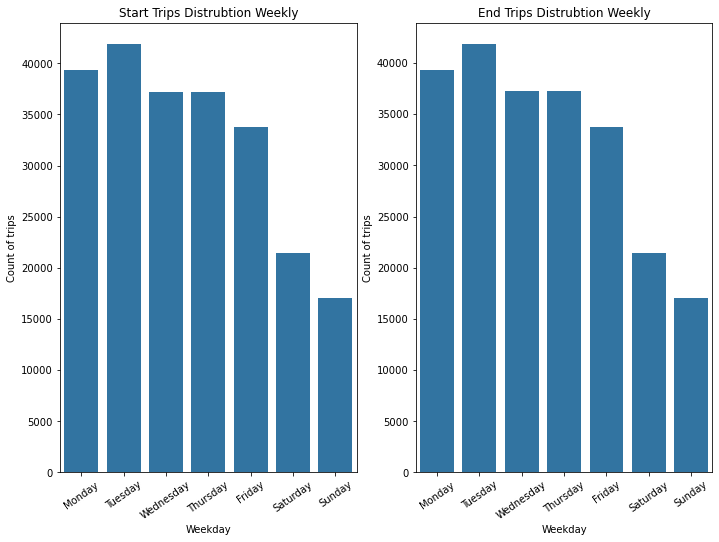

In [16]:
# make weekdays as sorted caterory
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
go.start_day = pd.Categorical(go.start_day, categories=days, ordered=True)
go.end_day = pd.Categorical(go.end_day, categories=days, ordered=True)
go = go.sort_values('start_day')
go = go.sort_values('end_day')

plt.figure(figsize = [11.69, 8.27])
# specify position of plot
plt.subplot(1, 2, 1)  
sb.countplot(data = go, x = 'start_day',color=base)
# specify title and axis labels
plt.title('Start Trips Distrubtion Weekly')
plt.xlabel('Weekday')
plt.xticks(rotation=35)
plt.ylabel('Count of trips');
# specify position of plot
plt.subplot(1, 2, 2)
sb.countplot(data = go, x = 'end_day',color=base);
# specify title and axis labels
plt.title('End Trips Distrubtion Weekly')
plt.xlabel('Weekday')
plt.xticks(rotation=35)
plt.ylabel('Count of trips');

### We'll see any pattern in trips during hours of all the day.
> That's clearly the most trips are during climax hours ( between 8:00 and 9:00 am and between 4:00 and 7:00 pm ) and fewest ( between 12:00 and 5:00 am ).

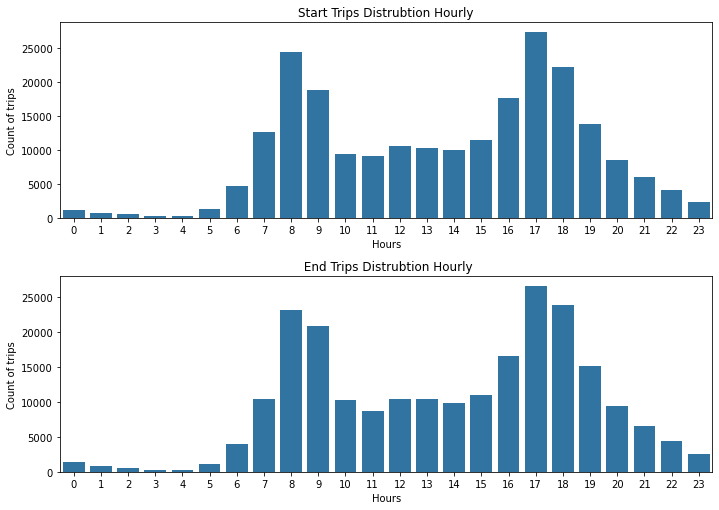

In [17]:
plt.figure(figsize = [11.69, 8.27])  
# specify position of plot
plt.subplot(2, 1, 1)  
sb.countplot(data = go, x = 'start_hour',color=base)
# specify title and axis labels
plt.title('Start Trips Distrubtion Hourly')
plt.xlabel('Hours')
plt.ylabel('Count of trips');
plt.subplots_adjust(hspace =.3)
# specify position of plot
plt.subplot(2, 1, 2)
sb.countplot(data = go, x = 'end_hour',color=base);
# specify title and axis labels
plt.title('\n End Trips Distrubtion Hourly')
plt.xlabel('Hours')
plt.ylabel('Count of trips');

### We'll see about the gender trips distribution.
> Most of the trips about 73% from male and 26% from female and less than 1% from others.

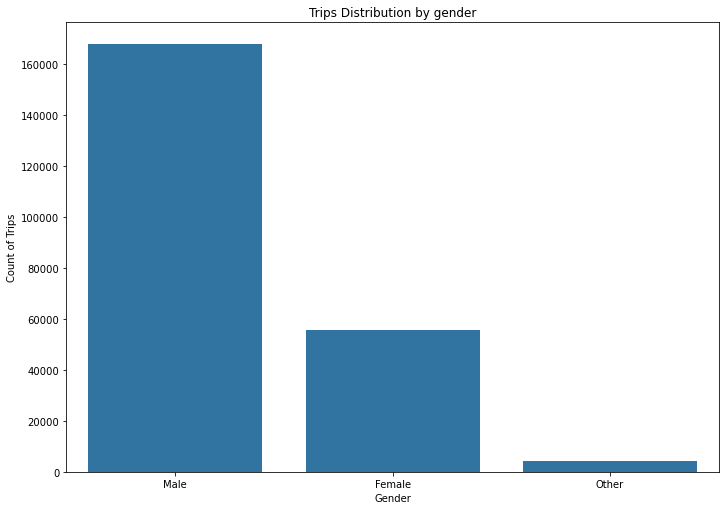

In [18]:
plt.figure(figsize = [11.69, 8.27])

sb.countplot(data=go, x='member_gender', color=base)
# specify title and axis labels
plt.title('Trips Distribution by gender')
plt.xlabel('Gender')
plt.ylabel('Count of Trips');

### It's the time to looking at the distribution of trips duration (in minutes) as an important factor.
> We find a concentration in the distribution so:
>> After customized plot with limitation scales to more specification, we find most of the trips between (5 and 20 minutes).

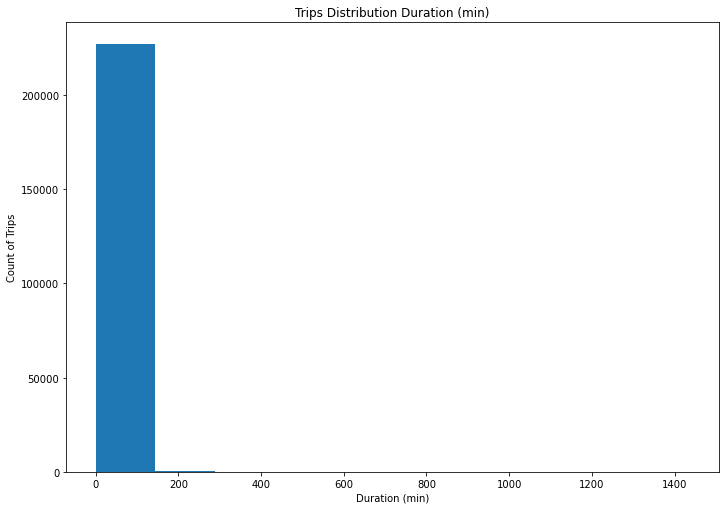

In [19]:
plt.figure(figsize = [11.69, 8.27])
plt.hist(data=go, x='duration_min', color=base)
# specify title and axis labels
plt.title('Trips Distribution Duration (min)')
plt.xlabel('Duration (min)')
plt.ylabel('Count of Trips');

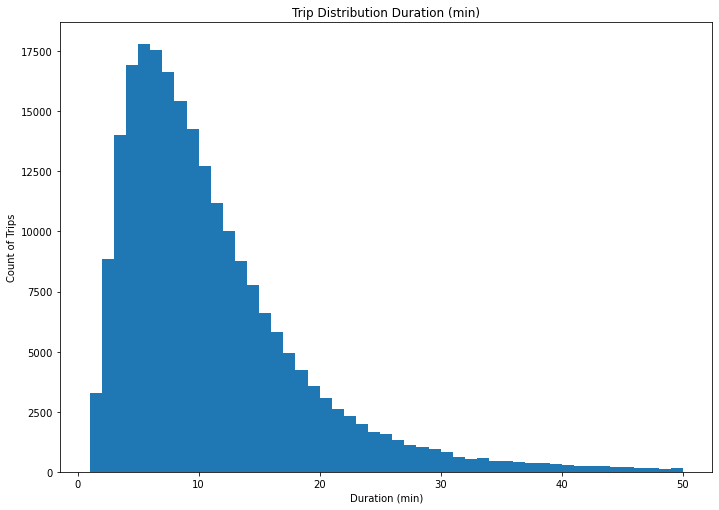

In [20]:
plt.figure(figsize = [11.69, 8.27])
# customize x bins
bins=np.arange(1,50+1,1)
plt.hist(data=go, x='duration_min', color=base,bins=bins)
# specify title and axis labels
plt.title('Trip Distribution Duration (min)')
plt.xlabel('Duration (min)')
plt.ylabel('Count of Trips');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> concentration in both of ( age and trip duration ), this required to specifying limitation in plots to look deeper in.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>- Extract hours and weekdays from start-time and end-time of trips to investigating any pattern in it
>- Produce age of individuals from member birth year compared to this year (2021)
>- Execluted unnecessary columns and any none available values that make the dataset tidier. 


## Bivariate Exploration

> In this section, we'll investigate relationships between pairs of variables in this
data to take a deeper look at the variables that we cover in the previous section (univariate exploration).

### We'll investigate any relationship between member gender and trip duration. 
> From the plot, we get that the females take a longer time than males. in another way, the number of males trips is greater than the number of females.

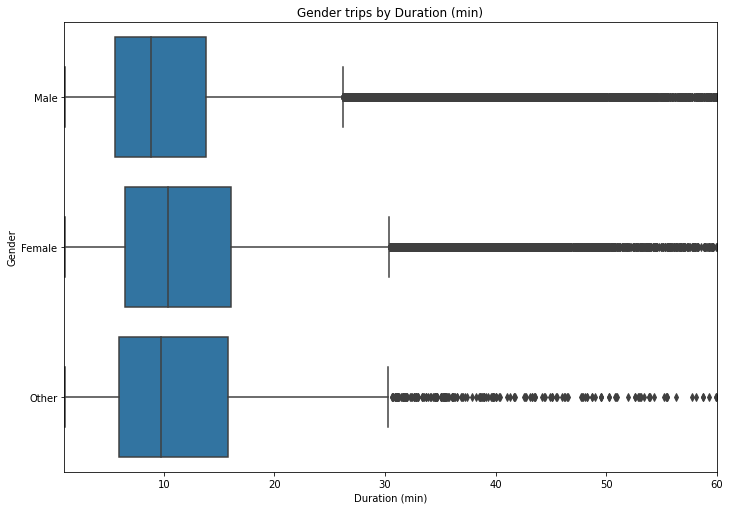

In [21]:
plt.figure(figsize = [11.69, 8.27])
sb.boxplot(data=go,y='member_gender',x='duration_min',color=base);
# specify title and axis labels and limits
plt.title('Gender trips by Duration (min)')
plt.ylabel('Gender')
plt.xlabel('Duration (min)')
plt.xlim(1,60);

### We'll investigate any relationship between member gender and age.
> We get those female users younger than all, and the other gender (not males) older than all.

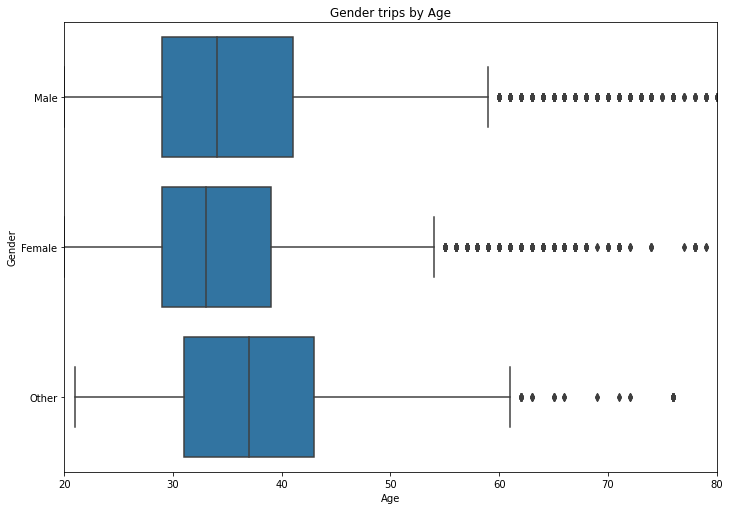

In [22]:
plt.figure(figsize = [11.69, 8.27])
sb.boxplot(data=go,y='member_gender',x='age',color=base);
# specify title and axis labels and limits
plt.title('Gender trips by Age')
plt.xlabel('Age')
plt.xlim(20,80)
plt.ylabel('Gender');

### We'll look at the relationship between member age and trip duration.
>Most of member long trips duration in age between (20th and 40th years).

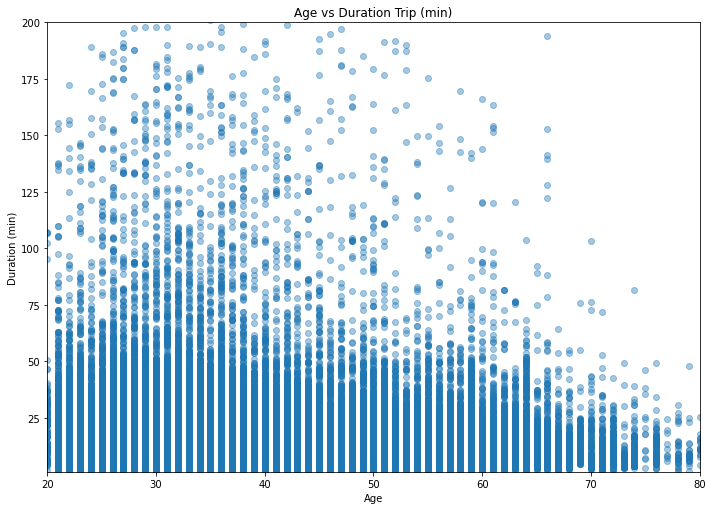

In [23]:
plt.figure(figsize = [11.69, 8.27])
plt.scatter(data=go,x='age',y='duration_min',alpha=.4);
# specify title and axis labels and limits
plt.title('Age vs Duration Trip (min)')
plt.xlabel('Age')
plt.xlim(20,80)
plt.ylabel('Duration (min)')
plt.ylim(1,200);


### We'll look at the relationship between start & end station and trip duration.
> We surprised here that:
>- longest average trip duration from start station with more than 45 minutes are from main traffic axes in downtown San Francisco like:
>>- [Foothill Blvd & Fruitvale Ave](https://www.google.com/maps/place/Foothill+Blvd+%26+Fruitvale+Ave,+Oakland,+CA+94601,+USA/@37.7837518,-122.224971,17z/data=!3m1!4b1!4m5!3m4!1s0x808f86f79e0ea5d1:0xca5f0db90bc1f7f2!8m2!3d37.7837518!4d-122.2227823)
>>- [Williams Ave and 3rd St](https://www.google.com/maps/place/Williams+Ave+and+3rd+St/@37.7294249,-122.3929973,15z/data=!4m5!3m4!1s0x0:0xbe60d950399cfe51!8m2!3d37.7294249!4d-122.3929973)
>- longest average trip duration from end station with about 6 hours from bike station near from train station that is:
>>[16th St Depot (Oakland)](https://www.google.com/maps/place/16th+Street+Station,+Wood+St,+Oakland,+CA+94607,+USA/@37.8154607,-122.2993424,17z/data=!3m1!4b1!4m5!3m4!1s0x80857e25b7e26ff7:0x697f344cc9e53194!8m2!3d37.8154607!4d-122.2971537)

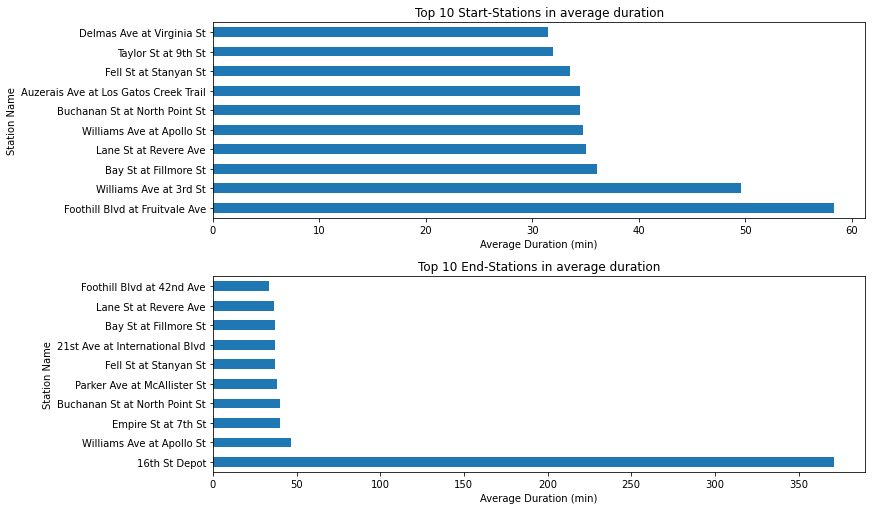

In [37]:
# prepare to display most 10 station in start and end trips
go_start=go.groupby('start_station_name').duration_min.mean().sort_values(ascending=False)[:10]
go_end=go.groupby('end_station_name').duration_min.mean().sort_values(ascending=False)[:10]

plt.figure(figsize = [11.69, 8.27])
# specify position of plot
plt.subplot(2, 1, 1)
plt.subplots_adjust(hspace=.3)
go_start.plot(kind='barh')
# specify title and axis labels
plt.title('Top 10 Start-Stations in average duration')
plt.xlabel('Average Duration (min)')
plt.ylabel('Station Name')
# specify position of plot
plt.subplot(2,1,2)
go_end.plot(kind='barh');
# specify title and axis labels
plt.title('Top 10 End-Stations in average duration')
plt.xlabel('Average Duration (min)')
plt.ylabel('Station Name');

### We'll look at the relationship between member gender and user type.
>That certainty most of the users are subscribers and most of from males.

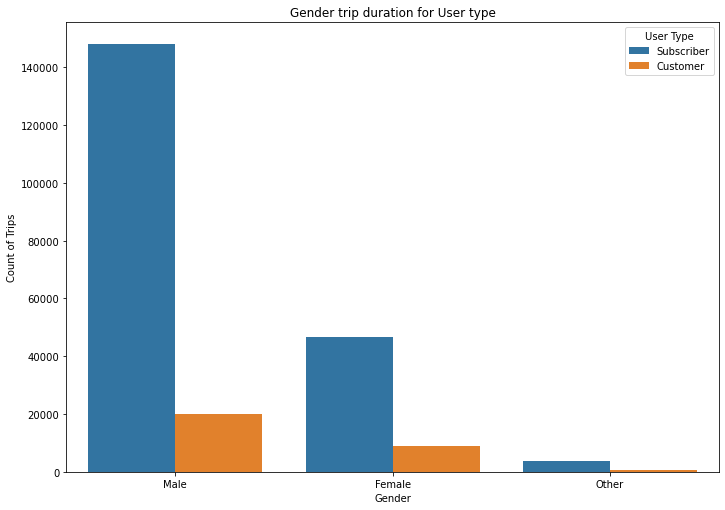

In [25]:
plt.figure(figsize = [11.69, 8.27])
sb.countplot(data = go, x = 'member_gender', hue = 'user_type')
# specify title and axis labels
plt.xlabel('Gender')
plt.ylabel('Count of Trips')
plt.title('Gender trip duration for User type')
plt.legend(title='User Type');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip Duration is very dependable on:
>>- The age of the member that younger is most users with longest duration trips
>>- Gender members like females that make longer trips than other otherwise males make the greatest trips number.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>Start station and end station location in town and other transportation methods make a variety of trips number and length of duration.

## Multivariate Exploration

> We'll take more than two variables to investigate the data to make sure that our investigations are justified in the previous sections.

### We'll take look deeper at the relationship among member gender, trip duration, and user type.
>Despite most of members gender are from subscribers but the longest duration trip is from customers.

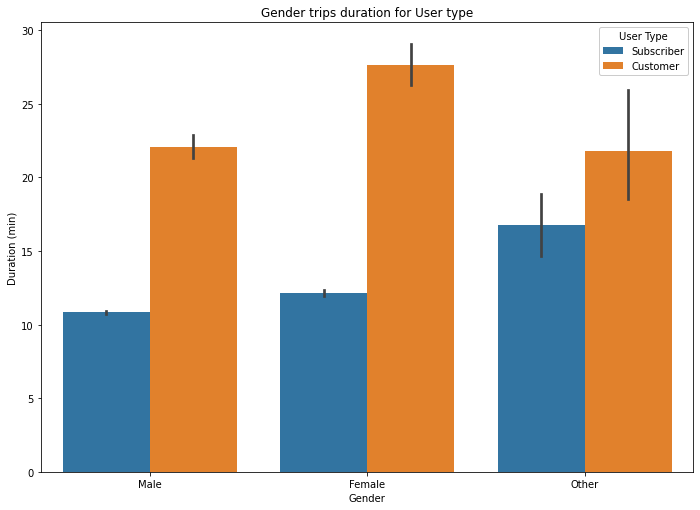

In [26]:
plt.figure(figsize = [11.69, 8.27])

g = sb.barplot(data = go, x = 'member_gender', y = 'duration_min', hue = 'user_type')
g.legend(loc = 1, ncol = 1, framealpha = 1, title = 'User Type')
# specify title and axis labels
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.title('Gender trips duration for User type'); 

### We'll take look deeper at the relationship among user type, age, and trip duration.
>We find that most users from subscribers concentrating (between 20th and 40th years), but the longest trips from customers concentrating (between 20th and 30th years).

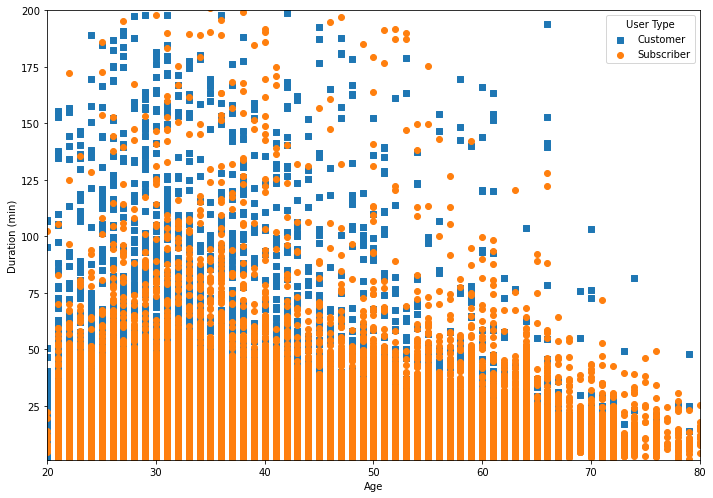

In [27]:
plt.figure(figsize = [11.69, 8.27])
user_markers = [['Customer', 's']
                  ,['Subscriber', 'o']]

for user, marker in user_markers:
    go_user = go.query('user_type == @user')
    plt.scatter(data=go_user,x='age', y='duration_min', marker = marker)
# specify title and axis labels and limits
plt.legend(['Customer','Subscriber'],title='User Type')
plt.xlim(20,80)
plt.ylim(1,200)
plt.xlabel('Age')
plt.ylabel('Duration (min)');

#### We'll take look deeper at the relationship among age, trip duration, and every user type in separate vertical plots.
>From these pair of plots we are sure that subscribers are widely distributing in age range with concentrating in less than 1 hour for trip duration, but customers are in narrow distributing age range with more spreading for trip duration.

<Figure size 841.68x595.44 with 0 Axes>

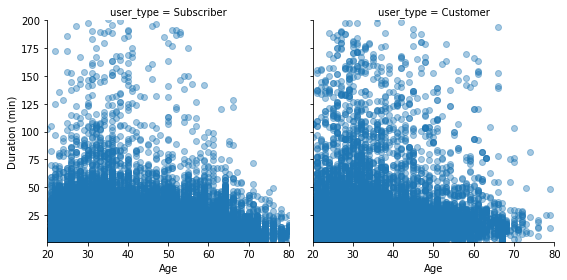

In [28]:
plt.figure(figsize = [11.69, 8.27])
ut = sb.FacetGrid(data = go, col = 'user_type', size = 4,xlim=[20,80],ylim=[1,200])
# specify title and axis labels and limits
ut.map(plt.scatter, 'age', 'duration_min', alpha=0.4)
ut.set_xlabels('Age')
ut.set_ylabels('Duration (min)');

### We'll take look deeper at the relationship among member gender, age, and trip duration.
>That provides us a good look that Males have fewer duration trips with concentrating in age range less than 50 years old, but females have most longer duration trips with concentrating in age range less 40 years.

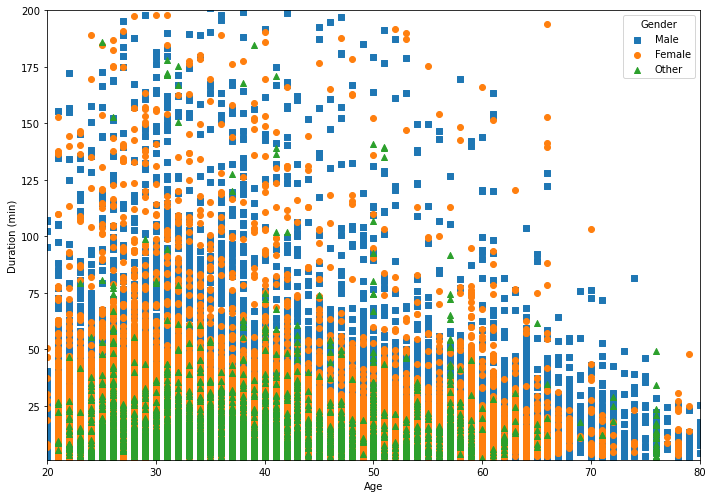

In [29]:
plt.figure(figsize = [11.69, 8.27])
gender_markers = [['Male', 's']
                  ,['Female', 'o']
                  ,['Other', '^']]

for gender, marker in gender_markers:
    go_gender = go.query('member_gender == @gender')
    plt.scatter(data=go_gender,x='age', y='duration_min', marker = marker)
# specify title and axis labels and limits
plt.legend(['Male','Female','Other'],title='Gender')
plt.xlim(20,80)
plt.ylim(1,200)
plt.xlabel('Age')
plt.ylabel('Duration (min)');

#### We'll take a deeper look at the relationship among age, trip duration, and member gender in separate vertical plots.
>We see that all previous observation is true, these plots clarify more spreading in age range with males, but females are less spreading in age with more spread in trip duration, "others" are the fewest spreading at all.

<Figure size 841.68x595.44 with 0 Axes>

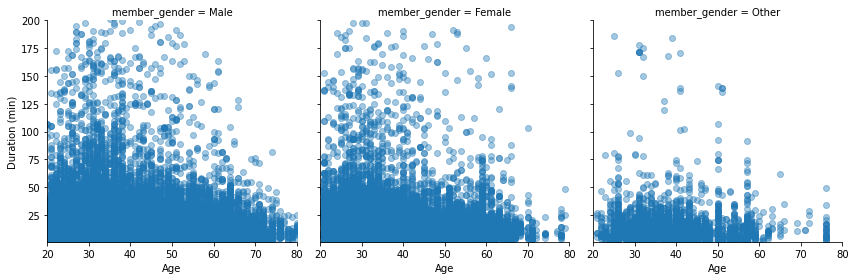

In [30]:
plt.figure(figsize = [11.69, 8.27])
mg = sb.FacetGrid(data = go, col = 'member_gender', size = 4,xlim=[20,80],ylim=[1,200])
# specify title and axis labels and limits
mg.map(plt.scatter, 'age', 'duration_min', alpha=0.4)
mg.set_xlabels('Age')
mg.set_ylabels('Duration (min)');

### We'll take a deeper look at the relationship among member gender, user type, and average trip duration.
>That make all investigations and observations clearly in the same way that:
>- longest average trips duration for customers and females have most of it.
>- Shortest average trips duration for subscribers and males have most of it.
>- "Other" gender has longest average trips in subscribers and shortest trips in customers.

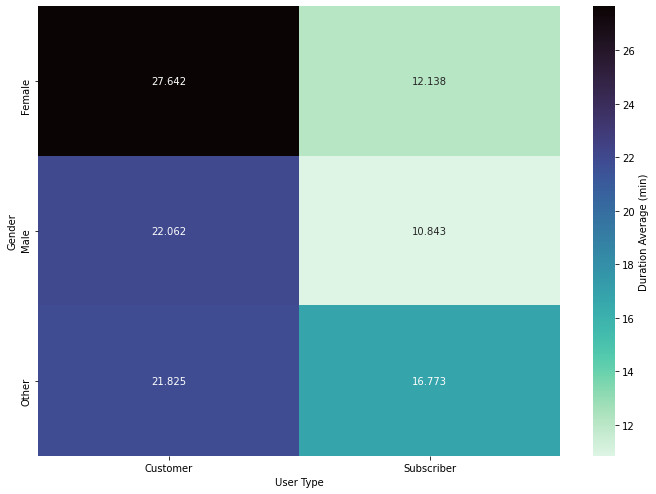

In [31]:
plt.figure(figsize = [11.69, 8.27])
# prepare to group member gender & user type in average duration 
go_gender = go.groupby(['member_gender', 'user_type']).duration_min.mean()
go_gender=go_gender.reset_index(name='average')
go_gender=go_gender.pivot(index='member_gender',columns='user_type',values='average')

sb.heatmap(go_gender,annot = True, fmt = '.3f',cmap='mako_r'
           ,cbar_kws = {'label' : 'Duration Average (min)'})
plt.xlabel('User Type')
plt.ylabel('Gender');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>- longest average trips duration for customers and females have most of it.
>- Shortest average trips duration for subscribers and males have most of it.

### Were there any interesting or surprising interactions between features?

>- Males have more spreading in age range with shortest trips duration.
>- Females are less spreading in age with more trips duration.
>- "Other" gender has longest average trips in subscribers and shortest trips in customers.

In [38]:
!jupyter nbconvert explanation_fordgobike.ipynb --to slides --no-input

[NbConvertApp] Converting notebook explanation_fordgobike.ipynb to slides
[NbConvertApp] Writing 803865 bytes to explanation_fordgobike.slides.html
